In [1]:
import contracts
contracts.disable_all()

In [2]:
import duckietown_uplan as uplan

INFO:dt-uplan:duckietown_uplan 1.0.0
INFO:dt-world:duckietown-world 1.0.15
DEBUG:dt-serialization:Registering class Serializable
DEBUG:dt-serialization:Registering class GenericData
DEBUG:dt-serialization:Registering class Sequence
DEBUG:dt-serialization:Registering class SampledSequence
DEBUG:dt-serialization:Registering class Constant
DEBUG:dt-serialization:Registering class RectangularArea
DEBUG:dt-serialization:Registering class TransformSequence
DEBUG:dt-serialization:Registering class VariableTransformSequence
DEBUG:dt-serialization:Registering class SE2Transform
DEBUG:dt-serialization:Registering class Scale2D
DEBUG:dt-serialization:Registering class Matrix2D
DEBUG:dt-serialization:Registering class SpatialRelation
DEBUG:dt-serialization:Registering class GroundTruth
DEBUG:dt-serialization:Registering class PlacedObject
DEBUG:dt-serialization:Registering class EvaluatedMetric
DEBUG:dt-serialization:Registering class GenericObject
DEBUG:dt-serialization:Registering class Duckie
D

In [3]:
%%html
<style>
pre {line-height: 90%}
</style>

In [4]:
import duckietown_world as dw
from duckietown_world.svg_drawing.ipython_utils import ipython_draw_html

In [5]:
dw.logger.setLevel(50)

In [6]:
current_map = dw.load_map('4way')

In [7]:
dt = uplan.DuckieTown(current_map)

In [8]:
current_map.tile_size

0.585

In [9]:
dt.draw_map_with_lanes()

In [10]:
#now augment the world more
dt.augment_graph()

In [11]:
dt.draw_map_with_lanes()

In [12]:
dt.render_current_graph()

In [13]:
dt.spawn_random_duckie(5)

In [14]:
dt.create_random_targets_for_all_duckies()

In [15]:
# from duckietown_world.geo.transforms import SE2Transform
# #Lets spawn some duckies here
# dt.spawn_duckie(SE2Transform([0.16379999399185186, 2.1], -2.61799))
# dt.spawn_duckie(SE2Transform([0.26, 1.75], -1.61799))
# dt.spawn_duckie(SE2Transform([2.5, 2.1], 1.91799))
# dt.spawn_duckie(SE2Transform([1.12, 2.1], 1.91799))
# dt.spawn_duckie(SE2Transform([0.16379999399185186, 1.8], 0))

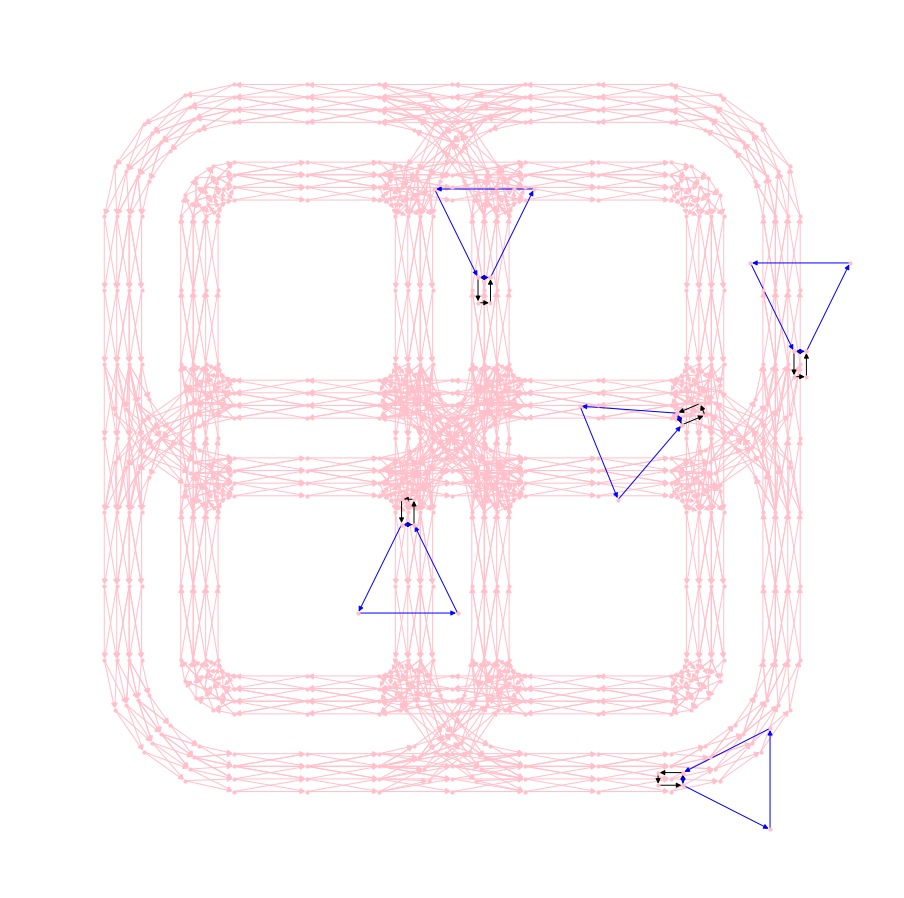

In [16]:
dt.render_current_graph()

In [17]:
#plan a path for one duckiebot and move it
my_duckie = dt.get_duckie(0)
my_duckie.set_visible_path(True)
# _, random_end_node_name = dt.get_random_node_in_graph()
# path_planner = uplan.PathPlanner(dt.get_map_current_graph())
# path = path_planner.get_shortest_path(my_duckie.get_current_positon(), random_end_node_name)
# my_duckie.set_path(path)

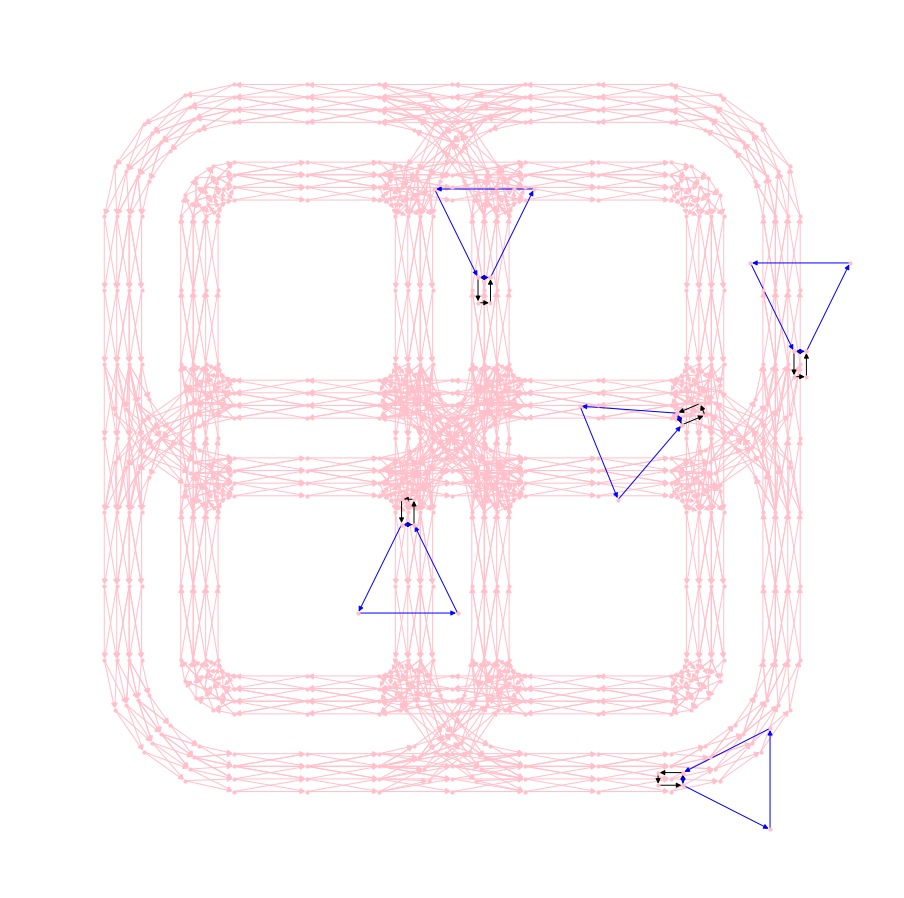

In [18]:
dt.render_current_graph()

In [19]:
# for duckie_id in range(0, 5):
#     observed_duckies, observed_nodes = dt.get_duckie_current_frame(duckie_id)
#     foot_print = dt.get_duckie_foot_print(duckie_id)
#     duckie = dt.get_duckie(duckie_id)
#     duckie.set_current_frame(observed_duckies, observed_nodes)
#     duckie.set_foot_print(foot_print)
#     print(observed_duckies)
# duckie.move(time_in_seconds)

In [20]:
# duckie_id = 0
# observed_duckies, observed_nodes = dt.get_duckie_current_frame(duckie_id)
# foot_print = dt.get_duckie_foot_print(duckie_id)
# duckie = dt.get_duckie(duckie_id)
# duckie.set_current_frame(observed_duckies, observed_nodes)
# duckie.set_foot_print(foot_print)
# print(observed_duckies)

In [21]:
dt.reset()

In [22]:
for i in range(0, 1):
    dt.step(1, display=True, folder='./data', file_index=i)

In [23]:
# import subprocess
# import os
# os.chdir("./data")
# subprocess.call([
#     'ffmpeg', '-framerate', '8', '-i', 'file%02d.png', '-r', '30', '-pix_fmt', 'yuv420p',
#     'video_name.mp4'
# ])
# for file_name in glob.glob("*.png"):
#     os.remove(file_name)

In [24]:
import cv2
import os

image_folder = './data'
video_name = 'video.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
images = sorted(images,key=lambda x: int(os.path.splitext(x)[0].split('file')[1]))
print(images)

frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, -1, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

['file00.png', 'file01.png', 'file02.png', 'file03.png', 'file04.png', 'file05.png', 'file06.png', 'file07.png', 'file08.png', 'file09.png', 'file10.png', 'file11.png', 'file12.png', 'file13.png', 'file14.png', 'file15.png', 'file16.png', 'file17.png', 'file18.png', 'file19.png', 'file20.png', 'file21.png', 'file22.png', 'file23.png', 'file24.png', 'file25.png', 'file26.png', 'file27.png', 'file28.png', 'file29.png', 'file30.png', 'file31.png', 'file32.png', 'file33.png', 'file34.png', 'file35.png', 'file36.png', 'file37.png', 'file38.png', 'file39.png', 'file40.png', 'file41.png', 'file42.png', 'file43.png', 'file44.png', 'file45.png', 'file46.png', 'file47.png', 'file48.png', 'file49.png']


In [25]:
collision = path_planner.build_collision_matrix()

NameError: name 'path_planner' is not defined

In [ ]:
collision[1][0]

In [ ]:
collision[0][1]

In [ ]:
#video creation
import os
folder_path = './data' 
os.mkdir(folder_path)
video_name = 'video.avi'
for i in range(0, 1):
    dt.step(1, save=True, folder=folder_path, file_index=i)